## 房价预测：用面积（平方米）和房龄（年）预测房价，假设输出与输入是线性关系

### 生成数据集

In [48]:
import torch
import numpy as np
num_samples = 1000 # 特征数
num_inputs = 2 # 样本数
true_w = [2, -3.4]
true_b = 4.2

features = torch.randn(num_samples, num_inputs, dtype = torch.float32)
labels = features[:, 0] * true_w[0] + features[:, 1] *true_w[1] + true_b
labels += torch.tensor(np.random.normal(0, 0.01, size = labels.size()), dtype = torch.float32)

### 展示数据集

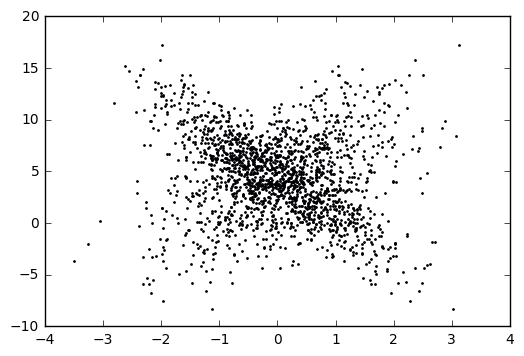

In [53]:
import matplotlib.pyplot as plt
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1)
plt.scatter(features[:, 0].numpy(), labels.numpy(), 1)
plt.show()

### 读取数据集

In [54]:
import torch.utils.data as Data
batch_size = 10
dataset = Data.TensorDataset(features, labels)
data_iter = Data.DataLoader(dataset, batch_size = batch_size, shuffle = True, num_workers = 2)

### 定义模型

In [78]:
import torch.nn as nn
class LinearNet(nn.Module):
    def __init__(self, n_features):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(n_features, 1)
        
    def forward(self, x):
        y = self.linear(x)
        return y
net = LinearNet(num_inputs)

print(net)
print(net.parameters())

LinearNet(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)
<generator object Module.parameters at 0x11b127938>


### 初始化模型参数

In [71]:
nn.init.xavier_uniform_(net.linear.weight)
nn.init.constant_(net.linear.bias, 0.1)

Parameter containing:
tensor([ 0.1000])

### 训练

In [91]:
import torch.optim as optim
loss = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr = 0.01)
num_epoches = 5
for epoch in range(1, num_epoches + 1):
    for X, y in data_iter:
        y_hat = net.forward(X)
        L = loss(y_hat, y.view(-1, 1))
        net.zero_grad()
        L.backward()
        optimizer.step()
    print('epoch %d, loss: %f' %(epoch, L.item()))

print(true_w, net.linear.weight.data)
print(true_b, net.linear.bias.data)


epoch 1, loss: 0.000123
epoch 2, loss: 0.000144
epoch 3, loss: 0.000182
epoch 4, loss: 0.000118
epoch 5, loss: 0.000362
[2, -3.4] tensor([[ 2.0014, -3.3933]])
4.2 tensor([ 4.2015])
